In [3]:
#import packages
import numpy as np
import pandas as pd
from numpy import array
#Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
#to plot within notebook
import matplotlib.pyplot as plt
import tensorflow as tf
# Calculating RMSE Performance
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [4]:
# Converting the array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
def predict(data):
    df1 = data.reset_index()['Close']
    df1= scaler.fit_transform(np.array(df1).reshape(-1, 1))
    # SPLITTING INTO TRAIN AND TEST
    #deciding the split size
    trainSize = int(len(df1)*0.65)
    testSize= len(df1)- trainSize

    #Making the splits
    trainData, testData = df1[0:trainSize, :],df1[trainSize:len(df1), :1 ] 
    time_step= 320
    X_train, Y_train= create_dataset(trainData, time_step)
    X_test, Y_test= create_dataset(testData, time_step)
    #Before going into LSTM, we have to make our data 3D
    X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    #making the model
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(320,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    
    #Training the model
    model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs= 15, batch_size=128, verbose=1)
    #Doing the predictions
    train_predict= model.predict(X_train)
    test_predict= model.predict(X_test)
    # transforming back to original , to perform RMSE
    train_predict= scaler.inverse_transform(train_predict)
    test_predict= scaler.inverse_transform(test_predict)
    
    #Plotting the training and testing data
    look_back= 320 #time stamp
    #Training data
    trainPredictPlot= np.empty_like(df1)
    trainPredictPlot[:, :]= np.nan
    trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict

    #Test Data
    testPredictPlot= np.empty_like(df1)
    testPredictPlot[:, :]= np.nan
    testPredictPlot[len(train_predict)+(look_back*2) +1: len(df1) -1 , :]= test_predict

    #Plotting the baseline and predictions

    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()
    
    x_input=testData[(len(testData)-320) :].reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    
    #MAKING PREDICTIONS FOR THE NEXT 15 DAYS
    
    lst_output=[]
    n_steps=320
    i=0
    while(i<15):

        if(len(temp_input)>320):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1

    day_new=np.arange(1,321)
    day_pred=np.arange(321,336)

    plt.plot(day_new,scaler.inverse_transform(df1[(len(df1)-320):]))
    plt.plot(day_pred,scaler.inverse_transform(lst_output))
    plt.show()     
    # Combining the data into one plot , checking only the predicted plot
    df3=df1.tolist()
    df3.extend(lst_output)
    df3=scaler.inverse_transform(df3[len(df1):]).tolist()
    
    plt.plot(df3)
    plt.show()
    
    diff = []
    for i in range(len(df3)-1):
        diff.append(df3[i][0] - df3[i+1][0])

    avg = sum(diff)/len(diff)
    
    return avg
             

Train on 2992 samples, validate on 1463 samples
Epoch 1/15
2992/2992 [==============================] - 127s 43ms/sample - loss: 0.0212 - val_loss: 0.0088
Epoch 2/15
2992/2992 [==============================] - 119s 40ms/sample - loss: 0.0016 - val_loss: 0.0034
Epoch 3/15
2992/2992 [==============================] - 136s 45ms/sample - loss: 7.5639e-04 - val_loss: 0.0038
Epoch 4/15
2992/2992 [==============================] - 165s 55ms/sample - loss: 6.8556e-04 - val_loss: 0.0035
Epoch 5/15
2992/2992 [==============================] - 274s 91ms/sample - loss: 6.5449e-04 - val_loss: 0.0035
Epoch 6/15
2992/2992 [==============================] - 180s 60ms/sample - loss: 6.3992e-04 - val_loss: 0.0034
Epoch 7/15
2992/2992 [==============================] - 135s 45ms/sample - loss: 6.2827e-04 - val_loss: 0.0034
Epoch 8/15
2992/2992 [==============================] - 146s 49ms/sample - loss: 6.1881e-04 - val_loss: 0.0033
Epoch 9/15
2992/2992 [==============================] - 230s 77ms/sample

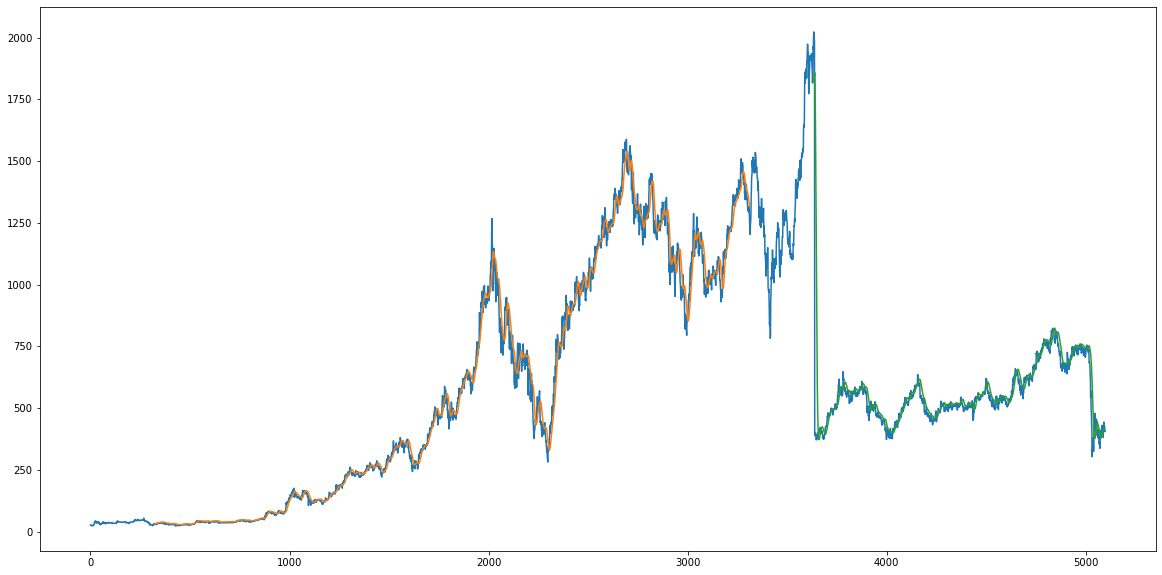

[0.19967252]
321
You can Invest in AXIS_BANK!
Train on 2945 samples, validate on 1439 samples
Epoch 1/15
2945/2945 [==============================] - 243s 82ms/sample - loss: 3.8191e-04 - val_loss: 0.0054
Epoch 2/15
2945/2945 [==============================] - 160s 54ms/sample - loss: 3.7551e-05 - val_loss: 0.0049
Epoch 3/15
2945/2945 [==============================] - 122s 41ms/sample - loss: 1.1343e-05 - val_loss: 0.0047
Epoch 4/15
2945/2945 [==============================] - 151s 51ms/sample - loss: 8.2883e-06 - val_loss: 0.0046
Epoch 5/15
2945/2945 [==============================] - 238s 81ms/sample - loss: 8.0996e-06 - val_loss: 0.0044
Epoch 6/15
2945/2945 [==============================] - 214s 73ms/sample - loss: 1.1719e-05 - val_loss: 0.0044
Epoch 7/15
2945/2945 [==============================] - 169s 57ms/sample - loss: 9.5323e-06 - val_loss: 0.0045
Epoch 8/15
2945/2945 [==============================] - 218s 74ms/sample - loss: 7.8659e-06 - val_loss: 0.0042
Epoch 9/15
2945/29

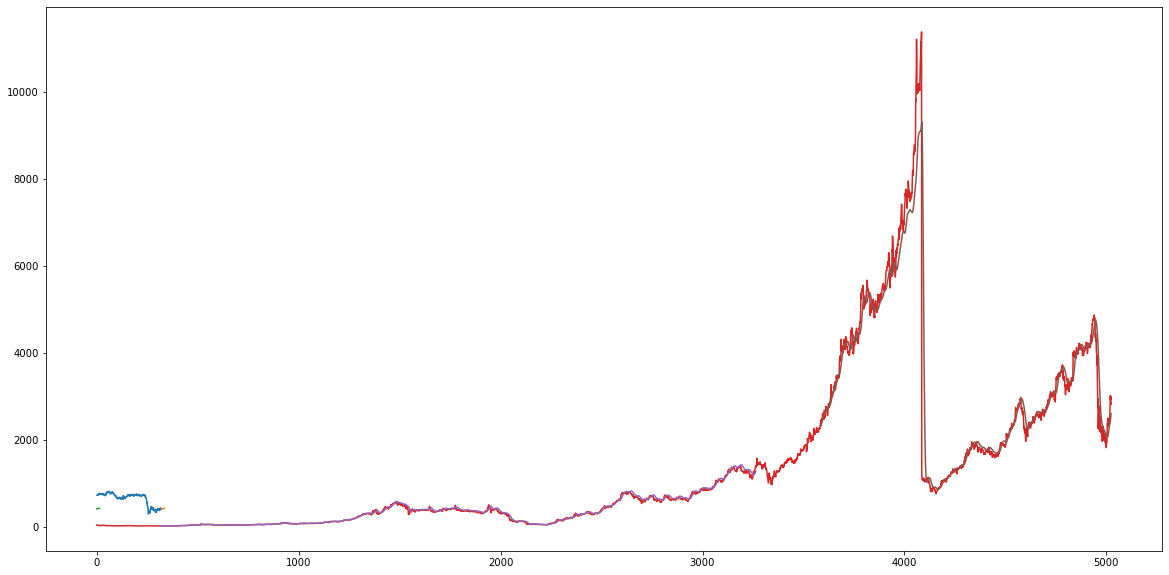

[0.23601241]
321
You can Invest in BAJAJ_FINANCE!
Train on 1623 samples, validate on 727 samples
Epoch 1/15
1623/1623 [==============================] - 131s 81ms/sample - loss: 0.0022 - val_loss: 0.0807
Epoch 2/15
1623/1623 [==============================] - 102s 63ms/sample - loss: 2.5689e-04 - val_loss: 0.0065
Epoch 3/15
1623/1623 [==============================] - 99s 61ms/sample - loss: 1.0001e-04 - val_loss: 0.0067
Epoch 4/15
1623/1623 [==============================] - 94s 58ms/sample - loss: 6.2658e-05 - val_loss: 0.0038
Epoch 5/15
1623/1623 [==============================] - 107s 66ms/sample - loss: 3.9316e-05 - val_loss: 0.0054
Epoch 6/15
1623/1623 [==============================] - 102s 63ms/sample - loss: 3.4211e-05 - val_loss: 0.0047
Epoch 7/15
1623/1623 [==============================] - 98s 61ms/sample - loss: 3.3542e-05 - val_loss: 0.0056
Epoch 8/15
1623/1623 [==============================] - 115s 71ms/sample - loss: 3.2923e-05 - val_loss: 0.0055
Epoch 9/15
1623/1623 [

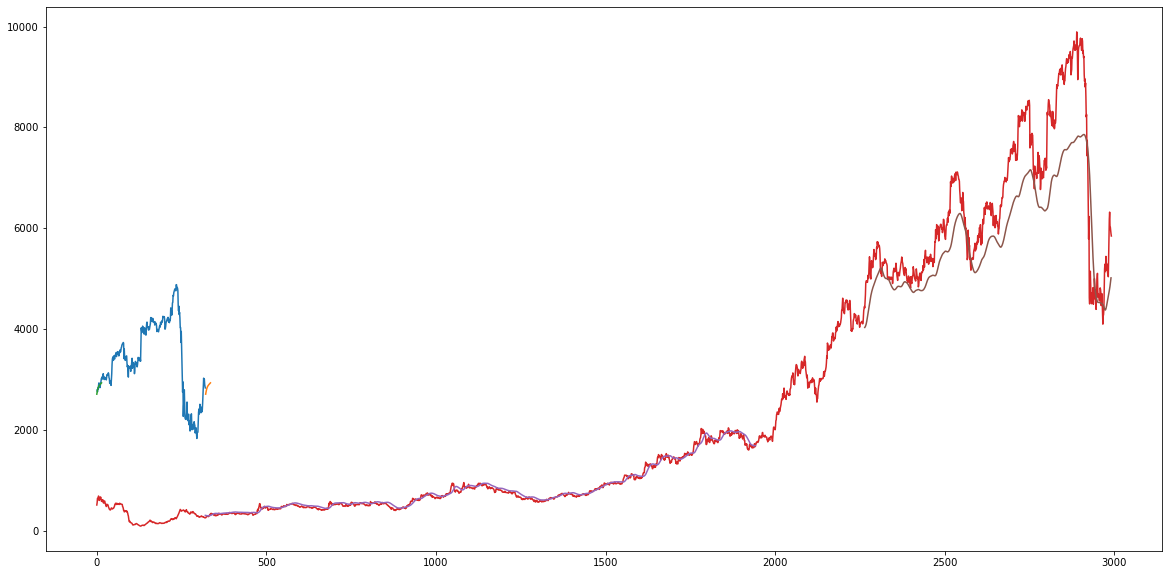

[0.5136571]
321
You should not invest in BAJAJ_FINSERV!
Train on 2992 samples, validate on 1463 samples
Epoch 1/15
2992/2992 [==============================] - 160s 53ms/sample - loss: 0.0293 - val_loss: 0.0068
Epoch 2/15
2992/2992 [==============================] - 220s 74ms/sample - loss: 0.0035 - val_loss: 0.0036
Epoch 3/15
2992/2992 [==============================] - 287s 96ms/sample - loss: 0.0028 - val_loss: 0.0015
Epoch 4/15
2992/2992 [==============================] - 183s 61ms/sample - loss: 0.0025 - val_loss: 0.0013
Epoch 5/15
2992/2992 [==============================] - 268s 89ms/sample - loss: 0.0022 - val_loss: 0.0014
Epoch 6/15
2992/2992 [==============================] - 249s 83ms/sample - loss: 0.0021 - val_loss: 0.0012
Epoch 7/15
2992/2992 [==============================] - 171s 57ms/sample - loss: 0.0020 - val_loss: 0.0016
Epoch 8/15
2992/2992 [==============================] - 216s 72ms/sample - loss: 0.0018 - val_loss: 0.0011
Epoch 9/15
2992/2992 [==================

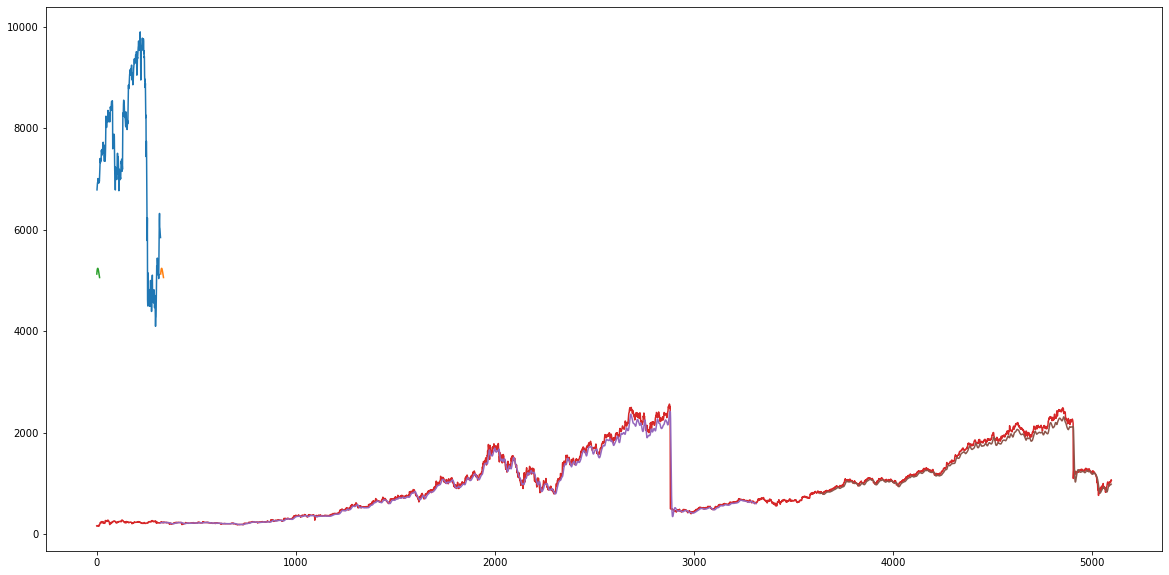

[0.34977263]
321
You should not invest in HDFC_BANK!
Train on 2992 samples, validate on 1463 samples
Epoch 1/15
2992/2992 [==============================] - 204s 68ms/sample - loss: 0.0216 - val_loss: 0.0094
Epoch 2/15
2992/2992 [==============================] - 190s 64ms/sample - loss: 0.0019 - val_loss: 0.0039
Epoch 3/15
2992/2992 [==============================] - 307s 103ms/sample - loss: 9.6973e-04 - val_loss: 0.0038
Epoch 4/15
2992/2992 [==============================] - 206s 69ms/sample - loss: 8.3189e-04 - val_loss: 0.0037
Epoch 5/15
2992/2992 [==============================] - 168s 56ms/sample - loss: 8.2937e-04 - val_loss: 0.0035
Epoch 6/15
2992/2992 [==============================] - 226s 76ms/sample - loss: 8.0115e-04 - val_loss: 0.0034
Epoch 7/15
2992/2992 [==============================] - 242s 81ms/sample - loss: 7.6887e-04 - val_loss: 0.0033
Epoch 8/15
2992/2992 [==============================] - 159s 53ms/sample - loss: 7.5162e-04 - val_loss: 0.0032
Epoch 9/15
2992/29

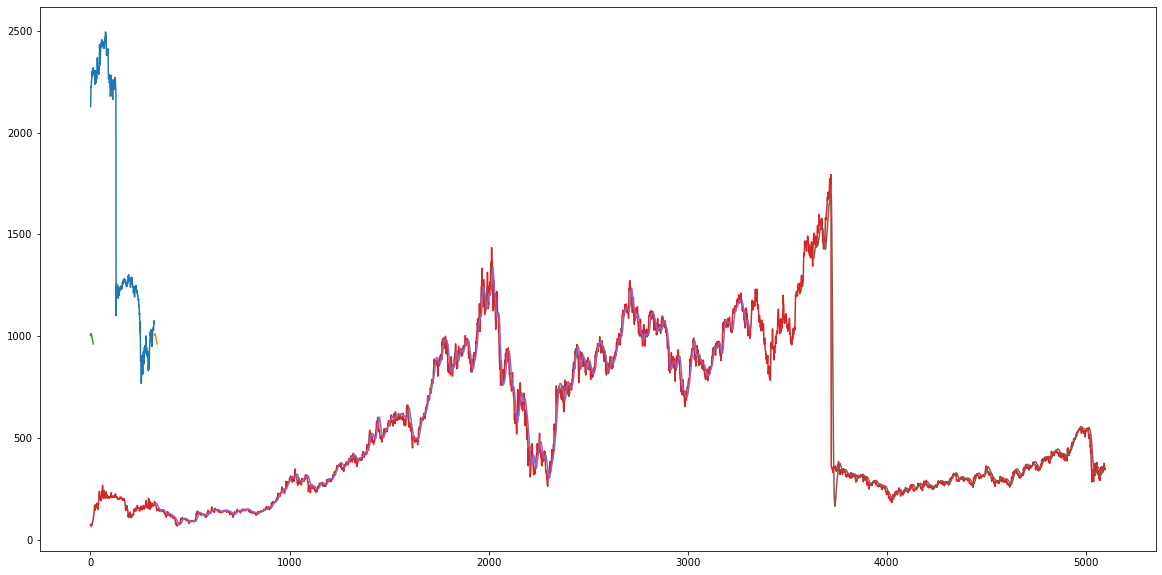

[0.17131494]
321
You can Invest in ICICIBANK!
Train on 2783 samples, validate on 1351 samples
Epoch 1/15
2783/2783 [==============================] - 143s 51ms/sample - loss: 0.0013 - val_loss: 0.0064
Epoch 2/15
2783/2783 [==============================] - 175s 63ms/sample - loss: 8.6117e-05 - val_loss: 0.0035
Epoch 3/15
2783/2783 [==============================] - 261s 94ms/sample - loss: 4.6150e-05 - val_loss: 0.0037
Epoch 4/15
2783/2783 [==============================] - 169s 61ms/sample - loss: 3.9174e-05 - val_loss: 0.0044
Epoch 5/15
2783/2783 [==============================] - 152s 55ms/sample - loss: 3.6913e-05 - val_loss: 0.0044
Epoch 6/15
2783/2783 [==============================] - 203s 73ms/sample - loss: 3.7204e-05 - val_loss: 0.0075
Epoch 7/15
2783/2783 [==============================] - 213s 77ms/sample - loss: 3.8148e-05 - val_loss: 0.0065
Epoch 8/15
2783/2783 [==============================] - 177s 64ms/sample - loss: 3.4751e-05 - val_loss: 0.0067
Epoch 9/15
2783/2783 [

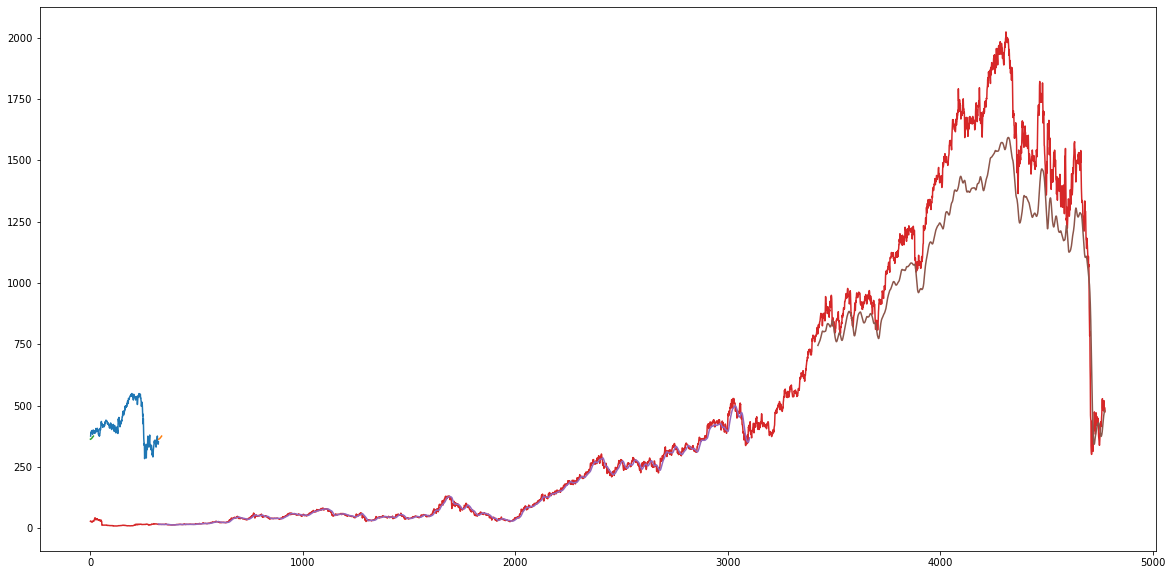

[0.23500922]
321
You should not invest in INDUSIND_BANK!
Train on 2783 samples, validate on 1351 samples
Epoch 1/15
2783/2783 [==============================] - 207s 74ms/sample - loss: 0.0169 - val_loss: 0.0100
Epoch 2/15
2783/2783 [==============================] - 185s 66ms/sample - loss: 0.0022 - val_loss: 0.0020
Epoch 3/15
2783/2783 [==============================] - 175s 63ms/sample - loss: 0.0012 - val_loss: 0.0019
Epoch 4/15
2783/2783 [==============================] - 186s 67ms/sample - loss: 0.0010 - val_loss: 0.0021
Epoch 5/15
2783/2783 [==============================] - 171s 62ms/sample - loss: 9.6174e-04 - val_loss: 0.0020
Epoch 6/15
2783/2783 [==============================] - 158s 57ms/sample - loss: 9.0616e-04 - val_loss: 0.0017
Epoch 7/15
2783/2783 [==============================] - 166s 59ms/sample - loss: 8.5539e-04 - val_loss: 0.0018
Epoch 8/15
2783/2783 [==============================] - 307s 110ms/sample - loss: 7.8033e-04 - val_loss: 0.0019
Epoch 9/15
2783/2783 [

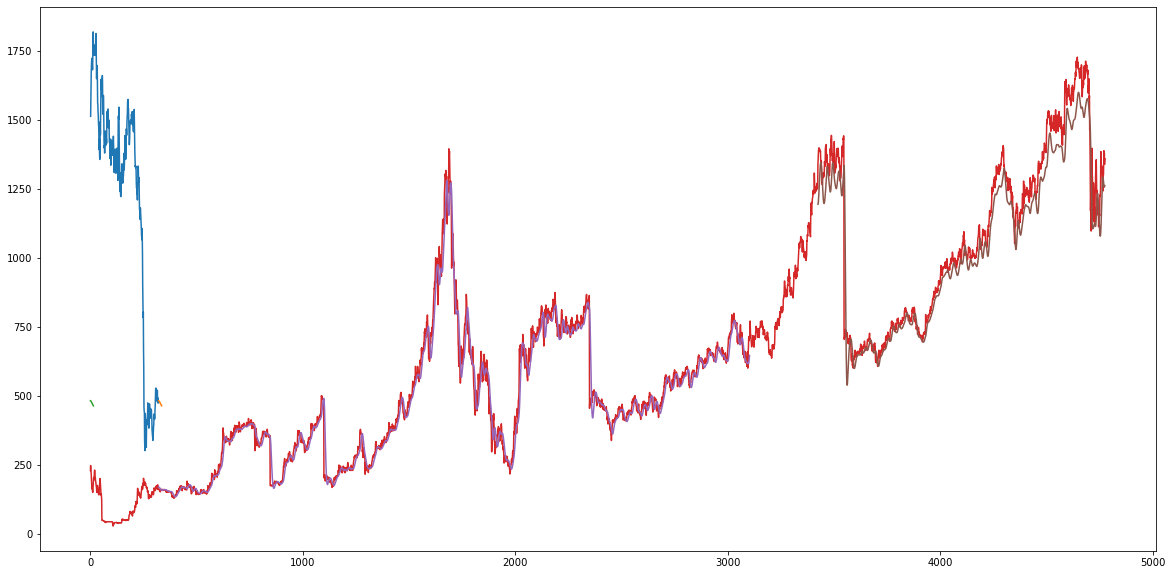

[0.73182195]
321
You should not invest in KOTAK_MAHINDRA!
Train on 2992 samples, validate on 1463 samples
Epoch 1/15
2992/2992 [==============================] - 274s 91ms/sample - loss: 0.0305 - val_loss: 0.0086
Epoch 2/15
2992/2992 [==============================] - 711s 238ms/sample - loss: 0.0022 - val_loss: 0.0033
Epoch 3/15
2992/2992 [==============================] - 206s 69ms/sample - loss: 0.0011 - val_loss: 0.0034
Epoch 4/15
2992/2992 [==============================] - 714s 238ms/sample - loss: 0.0010 - val_loss: 0.0033
Epoch 5/15
2992/2992 [==============================] - 200s 67ms/sample - loss: 9.7561e-04 - val_loss: 0.0030
Epoch 6/15
2992/2992 [==============================] - 143s 48ms/sample - loss: 9.4625e-04 - val_loss: 0.0029
Epoch 7/15
2992/2992 [==============================] - 150s 50ms/sample - loss: 9.2677e-04 - val_loss: 0.0029
Epoch 8/15
2992/2992 [==============================] - 294s 98ms/sample - loss: 8.7859e-04 - val_loss: 0.0028
Epoch 9/15
2992/2992

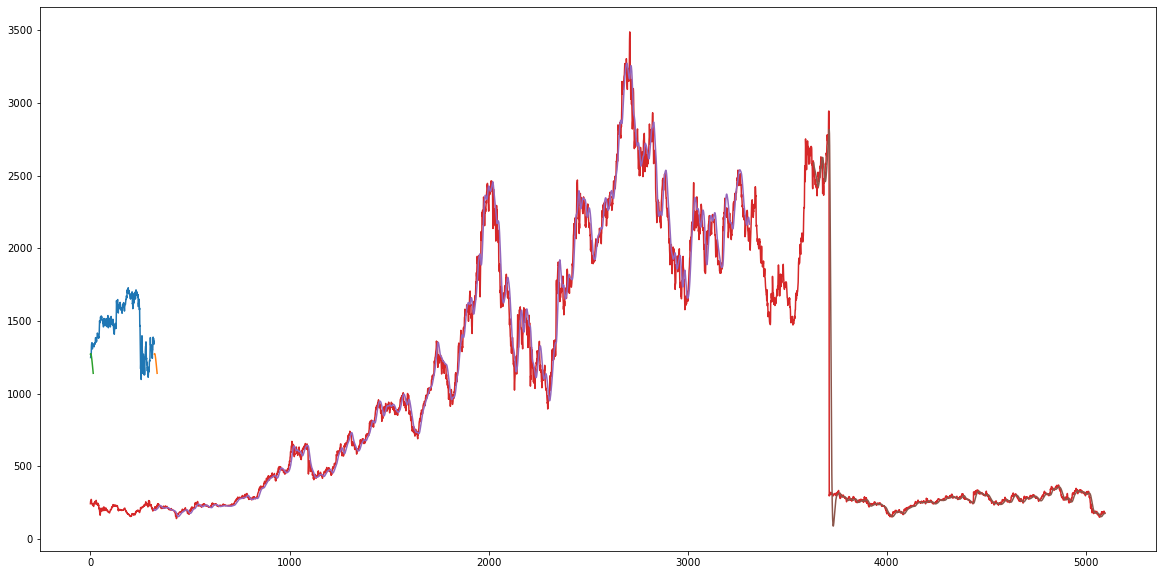

[0.01117379]
321
You should not invest in SBI!


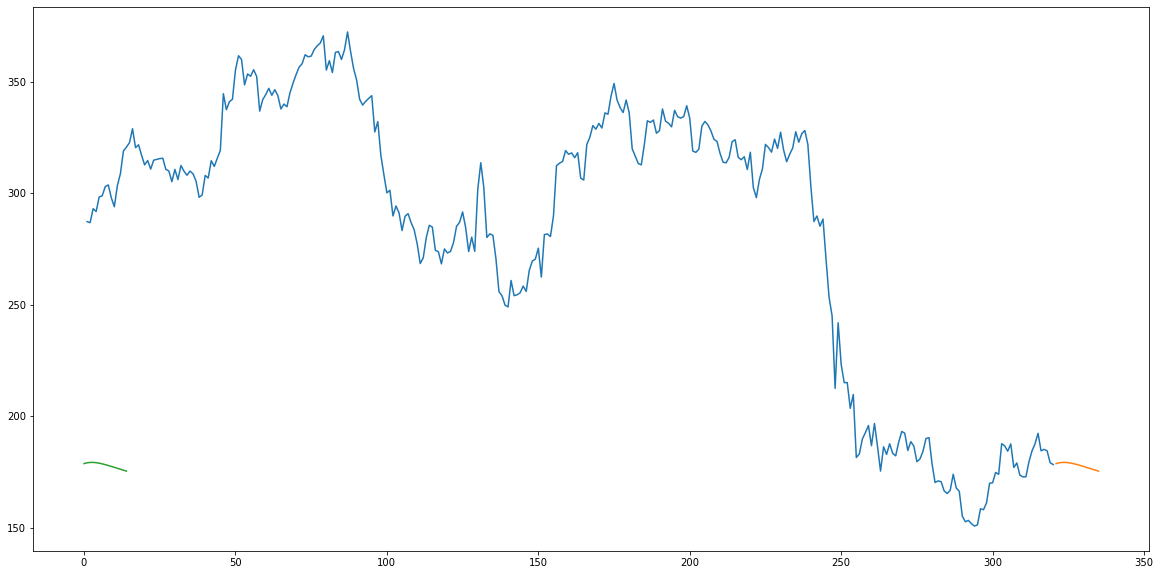

In [16]:
banks = {
    "AXIS_BANK": "not defined",
    "BAJAJ_FINANCE" : "not defined",
    "BAJAJ_FINSERV" : "not defined",
    "HDFC_BANK" : "not defined",
    "ICICIBANK" : "not defined",
    "INDUSIND_BANK" : "not defined",
    "KOTAK_MAHINDRA" : "not defined",
    "SBI" : "not defined"  
}

for i in banks:
    
    path = "./Dataset/BanksDataset/"+i+".csv"
    data = pd.read_csv(path)
    if banks[i] == "not defined":
        
        x = predict(data)
        banks[i] = x
        if banks[i] < 0:
            print("You can Invest in "+i+"!")
        elif banks[i] > 0:
            print("You should not invest in "+i+"!")
        else:
            print("You may Invest in "+i+"!")


In [18]:
sort_orders = sorted(banks.items(), key=lambda x: x[1], reverse=True)

print('This is the top bank that you should invest in is '+sort_orders[0][0])

This is the top bank that you should invest in is SBI


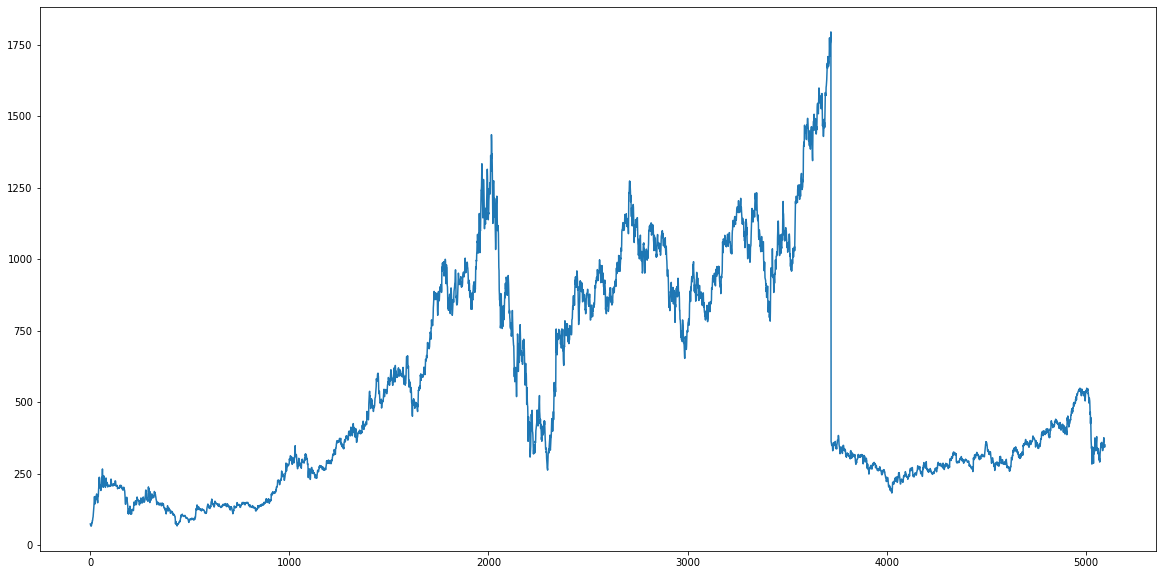

In [14]:
# Plotting the dataframe
plt.plot(df1)

In [15]:
df1= scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [16]:
df1

array([[0.00425667],
       [0.00327214],
       [0.00121619],
       ...,
       [0.16314357],
       [0.15966873],
       [0.16450455]])

In [17]:
df1.shape

(5097, 1)

In [18]:
# SPLITTING INTO TRAIN AND TEST
#deciding the split size
trainSize = int(len(df1)*0.65)
testSize= len(df1)- trainSize

#Making the splits
trainData, testData = df1[0:trainSize, :],df1[trainSize:len(df1), :1 ] 

In [19]:
len(trainData), len(testData)


(3313, 1784)

In [20]:
# Converting the array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step= 320
X_train, Y_train= create_dataset(trainData, time_step)
X_test, Y_test= create_dataset(testData, time_step)

In [22]:
print(X_train.shape)

(2992, 320)


In [23]:
print(Y_train.shape)

(2992,)


In [24]:
#Before going into LSTM, we have to make our data 3D
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [26]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(320,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs= 15, batch_size=128, verbose=1)

Train on 2992 samples, validate on 1463 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
2992/2992 [==============================] - 45s 15ms/sample - loss: 0.0297 - val_loss: 0.0077
Epoch 2/15
2992/2992 [==============================] - 41s 14ms/sample - loss: 0.0024 - val_loss: 0.0038
Epoch 3/15
2992/2992 [==============================] - 43s 14ms/sample - loss: 9.9159e-04 - val_loss: 0.0038
Epoch 4/15
2992/2992 [==============================] - 37s 12ms/sample - loss: 8.4726e-04 - val_loss: 0.0036
Epoch 5/15
2992/2992 [==============================] - 38s 13ms/sample - loss: 8.2830e-04 - val_loss: 0.0035
Epoch 6/15
2992/2992 [==============================] - 44s 15ms/sample - loss: 8.1493e-04 - val_loss: 0.0034
Epoch 7/15
2992/2992 [==============================] - 48s 16ms/sample - loss: 7.8557e-04 - val_loss: 0.0034
Epoch 8/15
2992/2992 [==============================] - 47s 16ms/sample - loss: 7.5098e-04 - val

In [29]:


#Doing the predictions
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

In [30]:
# transforming back to original , to perform RMSE
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [31]:

math.sqrt(mean_squared_error(Y_train, train_predict))


713.0094685111006

In [32]:
math.sqrt(mean_squared_error(Y_test, test_predict))

503.8601528594996

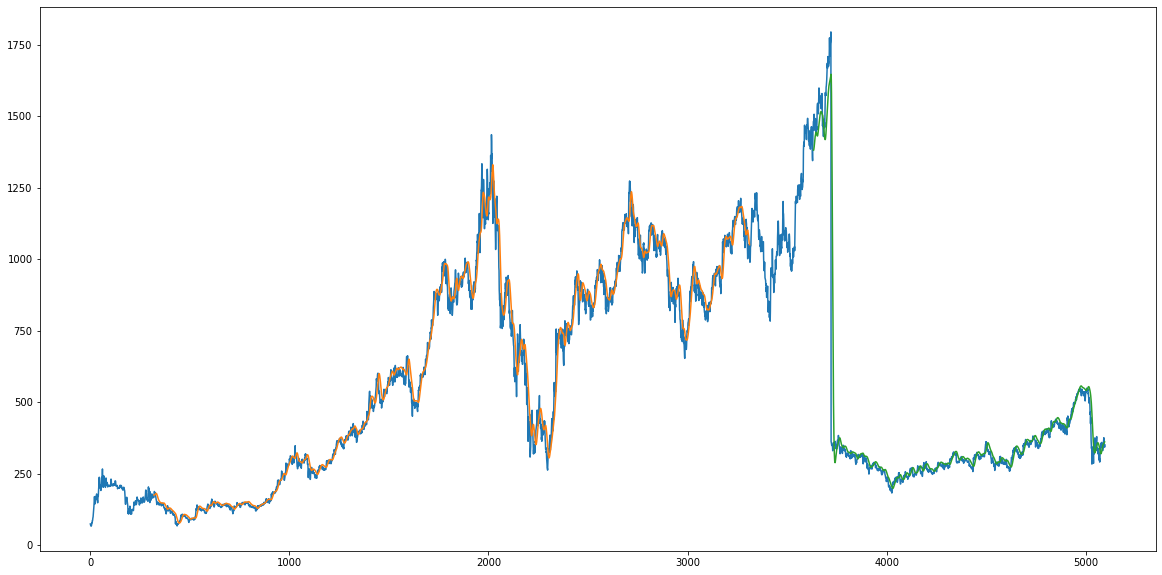

In [33]:
#Plotting the training and testing data
look_back= 320 #time stamp
#Training data
trainPredictPlot= np.empty_like(df1)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict

#Test Data
testPredictPlot= np.empty_like(df1)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(train_predict)+(look_back*2) +1: len(df1) -1 , :]= test_predict

#Plotting the baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [34]:
len(testData)

1784

In [35]:
x_input=testData[1464:].reshape(1,-1)
x_input.shape

(1, 320)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:


lst_output=[]
n_steps=320
i=0
while(i<15):
    
    if(len(temp_input)>320):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[[0.3375314772129059], [0.33880868554115295], [0.340089350938797], [0.3413734436035156], [0.342661052942276], [0.3439520597457886], [0.34524643421173096], [0.34654420614242554], [0.3478451669216156], [0.3491494655609131], [0.3504570424556732], [0.35176780819892883], [0.35308173298835754], [0.35439881682395935], [0.3557189702987671]]
Invest


In [38]:
day_new=np.arange(1,321)
day_pred=np.arange(321,336)

In [39]:
len(df1)

5097

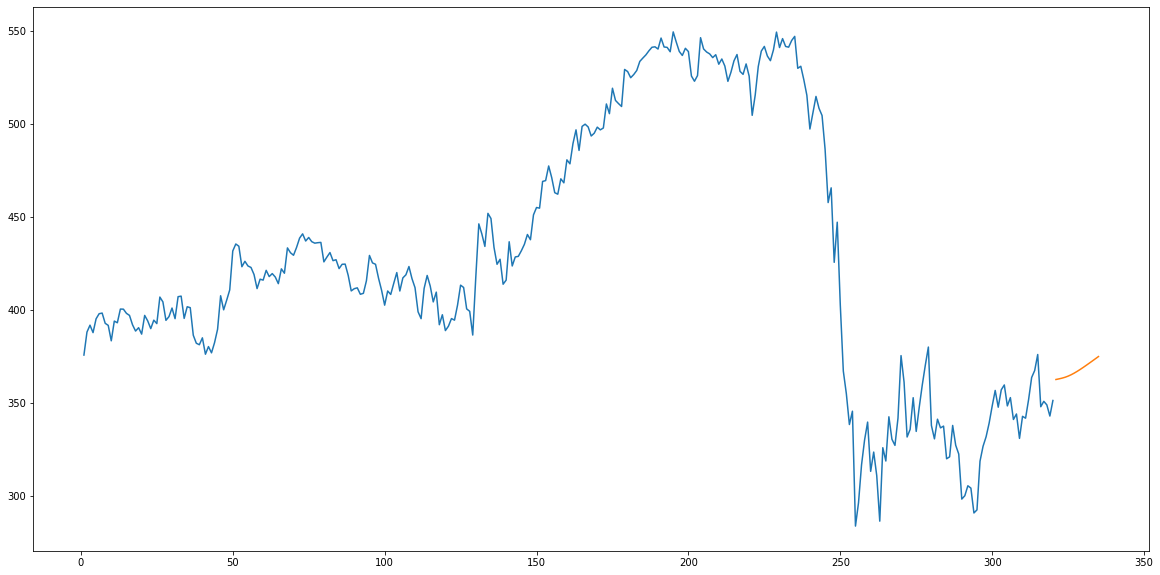

In [40]:

plt.plot(day_new,scaler.inverse_transform(df1[4777:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [42]:
df3=scaler.inverse_transform(df3[5097:]).tolist()

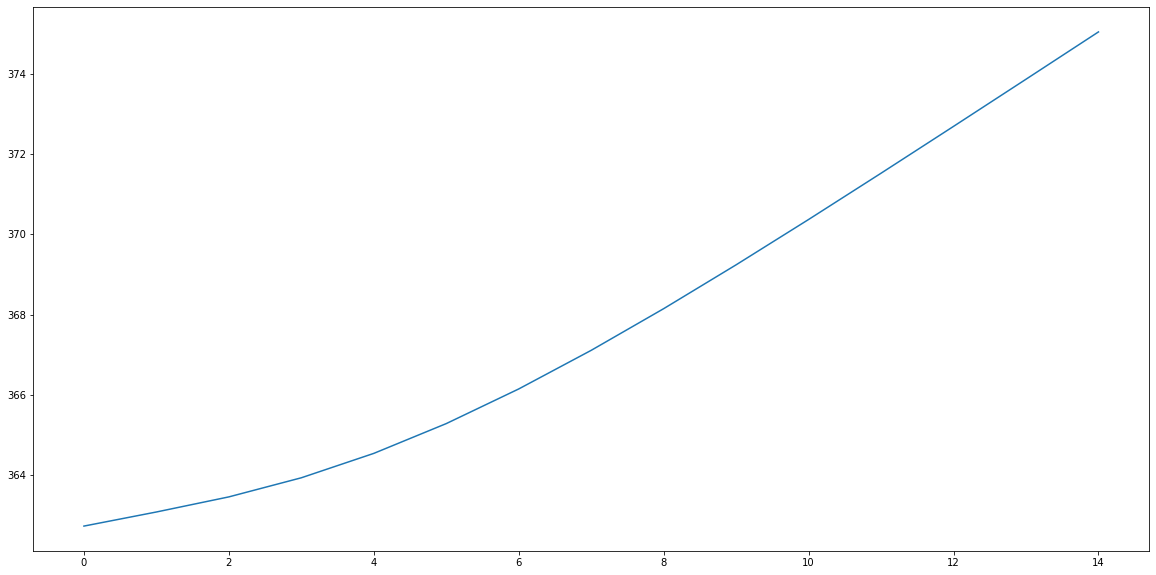

In [44]:
plt.plot(df3)